#Computer Vision Assignment 1
## Prakash Kumbhakar (22241)

In [1]:
# First, let's import the libraries we will need
import cv2          # for image handling
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for plotting images and histograms

## Question 1

In [3]:
# Let's load my photo here
# Note: OpenCV loads images in BGR by default Blue Green Red
image = cv2.imread('my_photo.jpg')

# Quick check if image is loaded because collab environment sometime deletes files and we forget
if image is None:
    print("Error: Image not found, please check path!")
else:
    print("Image loaded successfully!")


Image loaded successfully!


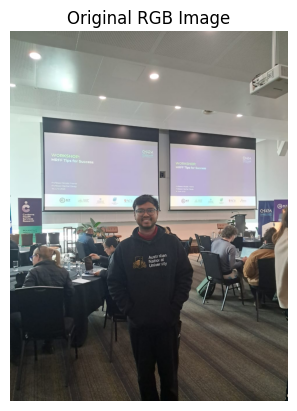

In [4]:
# Matplotlib expects RGB format, while OpenCV uses BGR
# So let's convert it properly to rgb
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image for confirmation of conversion
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()


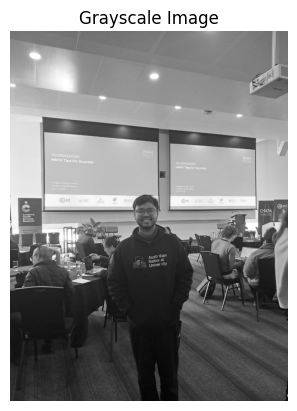

In [5]:
# Okay, now let's convert this image into grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

#oh nooo we are back to the old era of black and white


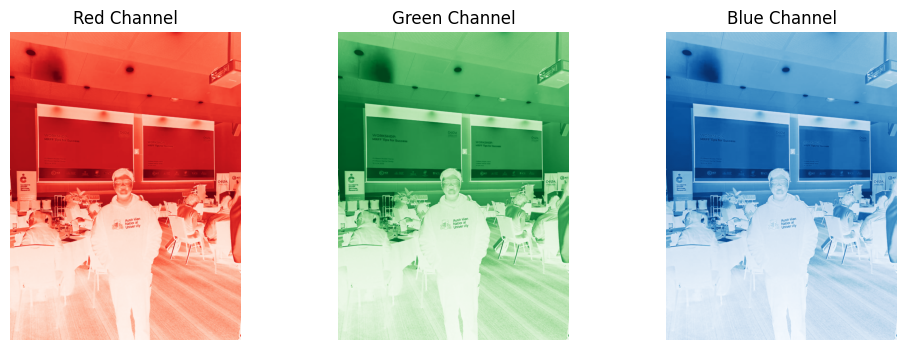

In [32]:
# Let's separate the channels now
# This is where I extract Red, Green, Blue from the original RGB image
R, G, B = cv2.split(image_rgb)

# Display each channel
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(R, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(G, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(B, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")

plt.show()


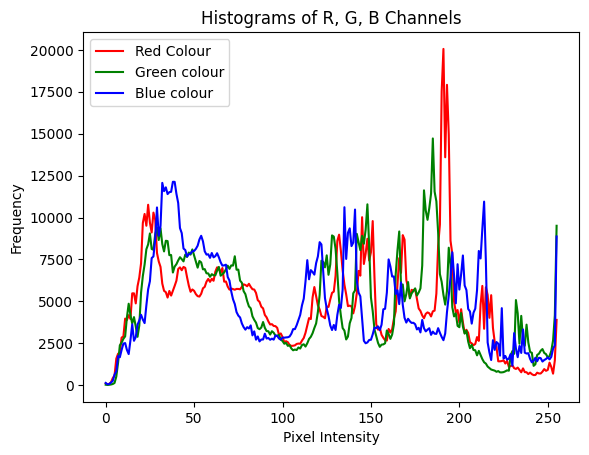

In [8]:
# Now let us move to next step: calculate histograms for each channel
# Histogram basically tells us how many pixels fall in each intensity level (0-255)

hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])

# Plot all histograms together
plt.plot(hist_R, color='red', label='Red Colour')
plt.plot(hist_G, color='green', label='Green colour')
plt.plot(hist_B, color='blue', label='Blue colour')
plt.title("Histograms of R, G, B Channels")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#we must take a look at this becuase we are going to obtain a different histogram later


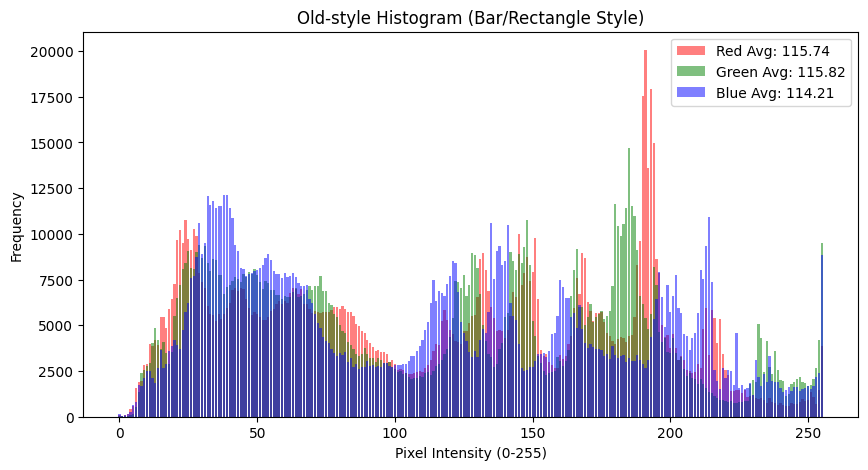

In [33]:
# Old-style histogram with rectangles (bar plots)
plt.figure(figsize=(10, 5))

# Red channel histogram
plt.bar(range(256), hist_R.ravel(), color='red', alpha=0.5, label=f"Red Avg: {np.mean(R):.2f}")

# Green channel histogram
plt.bar(range(256), hist_G.ravel(), color='green', alpha=0.5, label=f"Green Avg: {np.mean(G):.2f}")

# Blue channel histogram
plt.bar(range(256), hist_B.ravel(), color='blue', alpha=0.5, label=f"Blue Avg: {np.mean(B):.2f}")

plt.title("Old-style Histogram (Bar/Rectangle Style)")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## Question 2

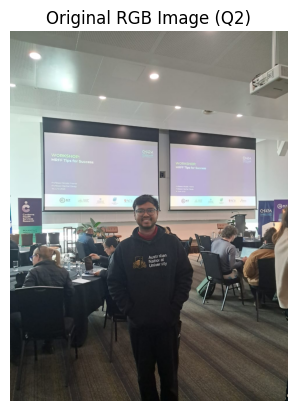

In [10]:
image2_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image2_rgb)
plt.title("Original RGB Image (Q2)")
plt.axis("off")
plt.show()


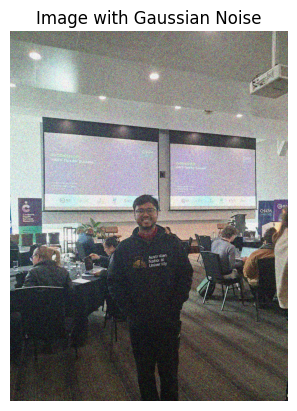

In [34]:
# Okay, now let's add Gaussian noise to the image
# Gaussian noise = random values from a normal distribution added to pixel values

mean = 0
var = 1500
sigma = var ** 0.5

# Generate Gaussian noise same size as the image
gauss = np.random.normal(mean, sigma, image2_rgb.shape).astype('float32')

# Add noise and clip to valid range [0,255]
noisy_img = image2_rgb + gauss
noisy_img = np.clip(noisy_img, 0, 255).astype('uint8')

# Show the noisy image
plt.imshow(noisy_img)
plt.title("Image with Gaussian Noise")
plt.axis("off")
plt.show()


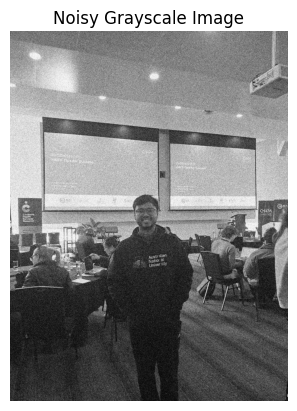

In [35]:
# Now let's convert the noisy RGB image to grayscale
gray_noisy = cv2.cvtColor(noisy_img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_noisy, cmap='gray')
plt.title("Noisy Grayscale Image")
plt.axis("off")
plt.show()


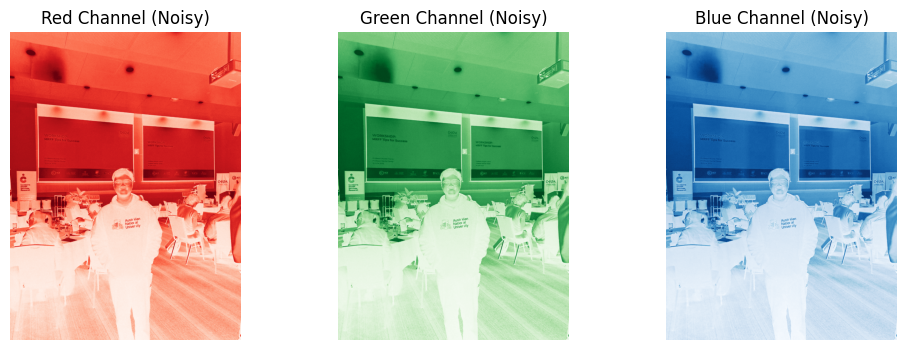

In [14]:
# Next step: Visualize individual color channels
R2, G2, B2 = cv2.split(noisy_img)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(R2, cmap='Reds')
plt.title("Red Channel (Noisy)")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(G2, cmap='Greens')
plt.title("Green Channel (Noisy)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(B2, cmap='Blues')
plt.title("Blue Channel (Noisy)")
plt.axis("off")

plt.show()


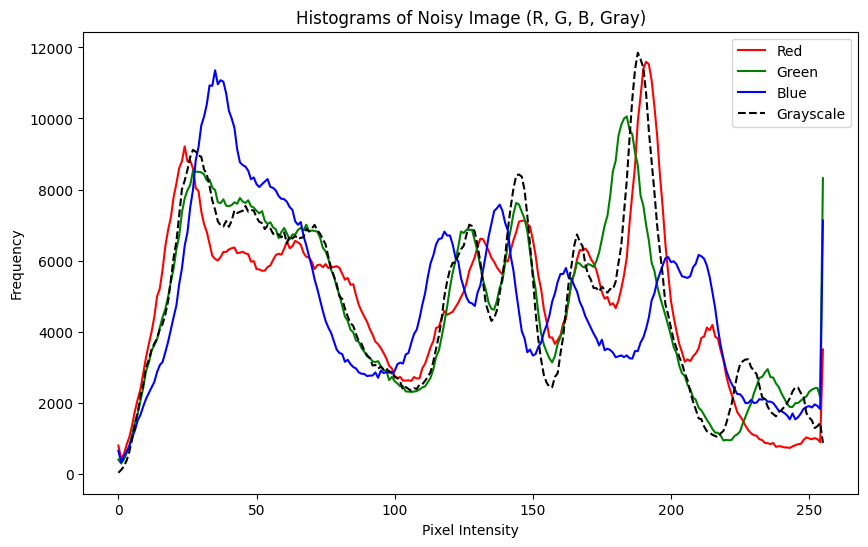

In [15]:
# Let's compute histograms for R, G, B, and also for grayscale noisy image
hist_R2 = cv2.calcHist([R2], [0], None, [256], [0, 256])
hist_G2 = cv2.calcHist([G2], [0], None, [256], [0, 256])
hist_B2 = cv2.calcHist([B2], [0], None, [256], [0, 256])
hist_Gray = cv2.calcHist([gray_noisy], [0], None, [256], [0, 256])

# Plot histograms clearly
plt.figure(figsize=(10,6))

plt.plot(hist_R2, color='red', label='Red')
plt.plot(hist_G2, color='green', label='Green')
plt.plot(hist_B2, color='blue', label='Blue')
plt.plot(hist_Gray, color='black', linestyle='--', label='Grayscale')
plt.title("Histograms of Noisy Image (R, G, B, Gray)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


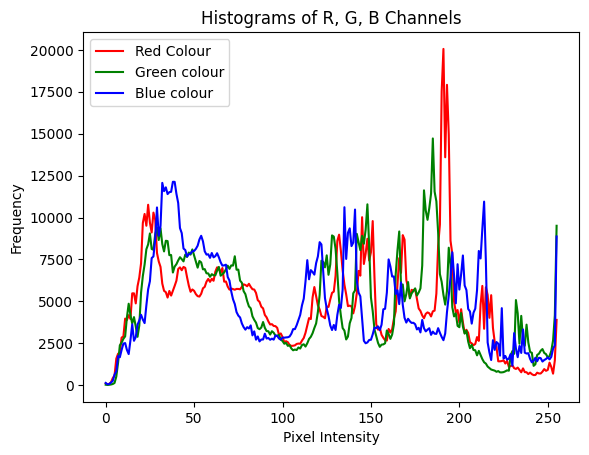

In [17]:
# Lets' compare the previous and the new histograms

hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])

# Plot all histograms together
plt.plot(hist_R, color='red', label='Red Colour')
plt.plot(hist_G, color='green', label='Green colour')
plt.plot(hist_B, color='blue', label='Blue colour')
plt.title("Histograms of R, G, B Channels")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## Question 3

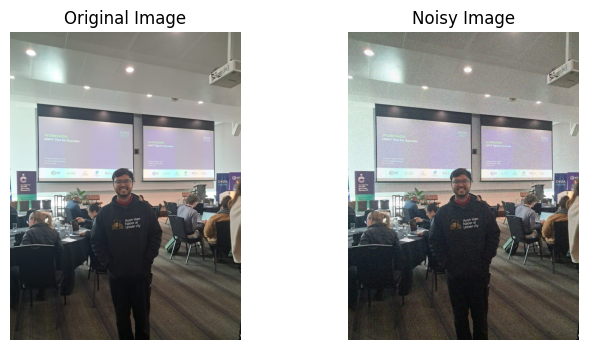

In [19]:
# Let's start again by loading the image
img3 = cv2.imread("my_photo.jpg")
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Let's also make a Gaussian noisy version of this image (same as Q2)
mean = 0
var = 300
sigma = var ** 0.5
gauss = np.random.normal(mean, sigma, img3_rgb.shape).astype('float32')
noisy_img3 = img3_rgb + gauss
noisy_img3 = np.clip(noisy_img3, 0, 255).astype('uint8')

# Show both
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(img3_rgb); plt.title("Original Image"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(noisy_img3); plt.title("Noisy Image"); plt.axis("off")
plt.show()


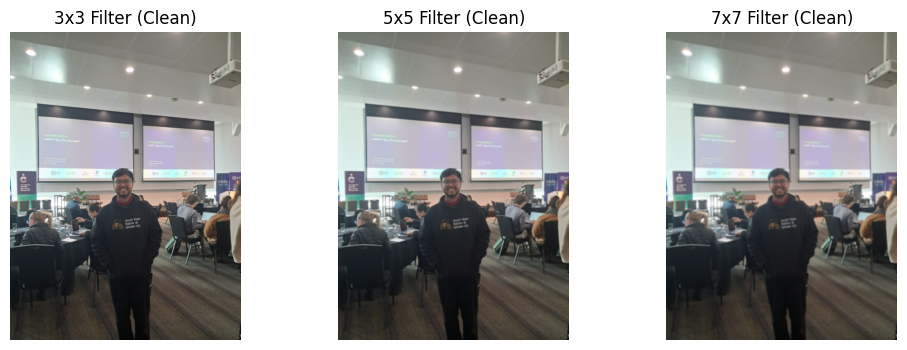

In [20]:
# Now let's apply different smoothing filters (kernel sizes 3x3, 5x5, 7x7)
# I'll use cv2.blur (mean filter) for simplicity, you could also try cv2.GaussianBlur

def apply_filters(image):
    f3 = cv2.blur(image, (3,3))
    f5 = cv2.blur(image, (5,5))
    f7 = cv2.blur(image, (7,7))
    return f3, f5, f7

# Apply filters on both clean and noisy images
f3_clean, f5_clean, f7_clean = apply_filters(img3_rgb)
f3_noisy, f5_noisy, f7_noisy = apply_filters(noisy_img3)

# Just to check: display clean filtered versions
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(f3_clean); plt.title("3x3 Filter (Clean)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(f5_clean); plt.title("5x5 Filter (Clean)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(f7_clean); plt.title("7x7 Filter (Clean)"); plt.axis("off")
plt.show()


In [21]:
# Most edge detectors work on grayscale images
def to_gray_set(img_set):
    return [cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) for im in img_set]

clean_gray_set = to_gray_set([f3_clean, f5_clean, f7_clean])
noisy_gray_set = to_gray_set([f3_noisy, f5_noisy, f7_noisy])


In [22]:
# Function for applying Sobel (magnitude), Sobel (x & y separately), Laplacian
def edge_detectors(gray_img):
    # Sobel in X and Y
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)

    # Sobel magnitude (combined)
    sobel_mag = cv2.magnitude(sobelx, sobely)

    # Laplacian
    laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)

    return sobel_mag, sobelx, sobely, laplacian


In [23]:
# Let's try for clean images first (3x3, 5x5, 7x7)
edges_clean = [edge_detectors(g) for g in clean_gray_set]

# And now for noisy images
edges_noisy = [edge_detectors(g) for g in noisy_gray_set]


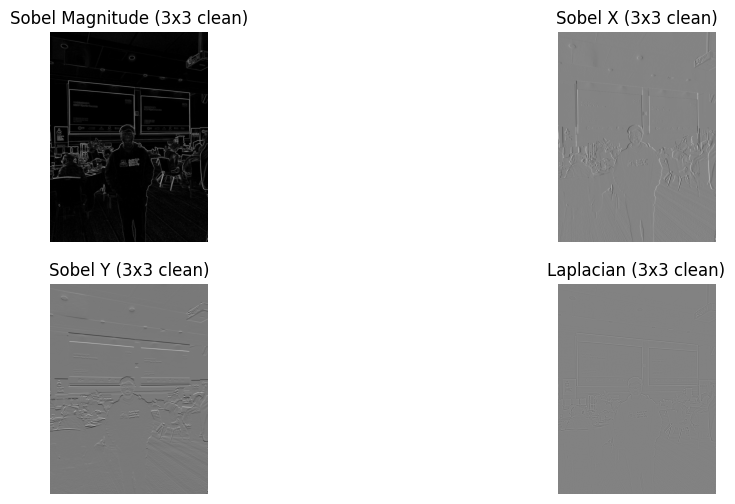

In [24]:
# Let's visualize for one case first (clean + 3x3 filter)
sobel_mag, sobelx, sobely, laplacian = edges_clean[0]

plt.figure(figsize=(12,6))
plt.subplot(2,2,1); plt.imshow(sobel_mag, cmap='gray'); plt.title("Sobel Magnitude (3x3 clean)"); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(sobelx, cmap='gray'); plt.title("Sobel X (3x3 clean)"); plt.axis("off")
plt.subplot(2,2,3); plt.imshow(sobely, cmap='gray'); plt.title("Sobel Y (3x3 clean)"); plt.axis("off")
plt.subplot(2,2,4); plt.imshow(laplacian, cmap='gray'); plt.title("Laplacian (3x3 clean)"); plt.axis("off")
plt.show()


---- Results for Filter Size 3x3 (Clean Image) ----


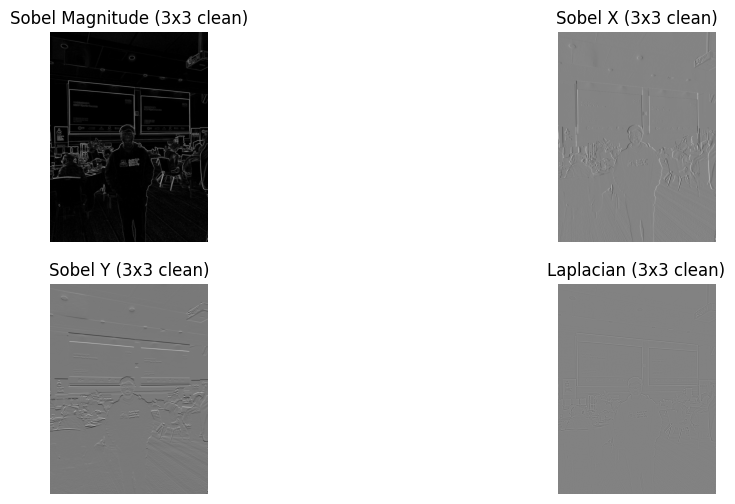

---- Results for Filter Size 3x3 (Noisy Image) ----


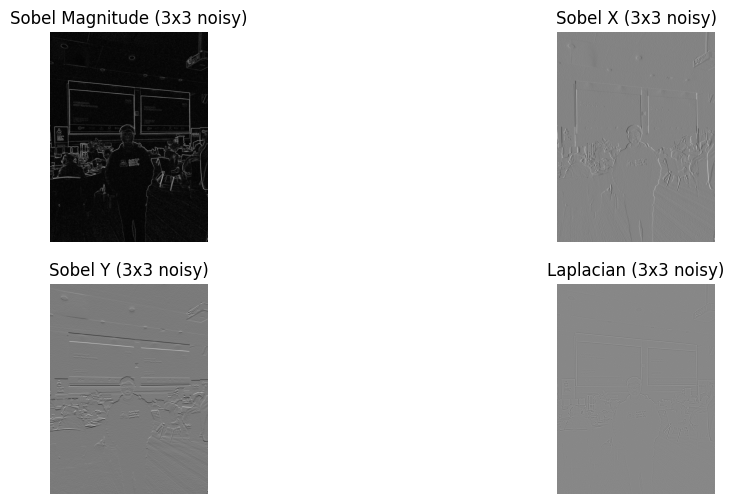

---- Results for Filter Size 5x5 (Clean Image) ----


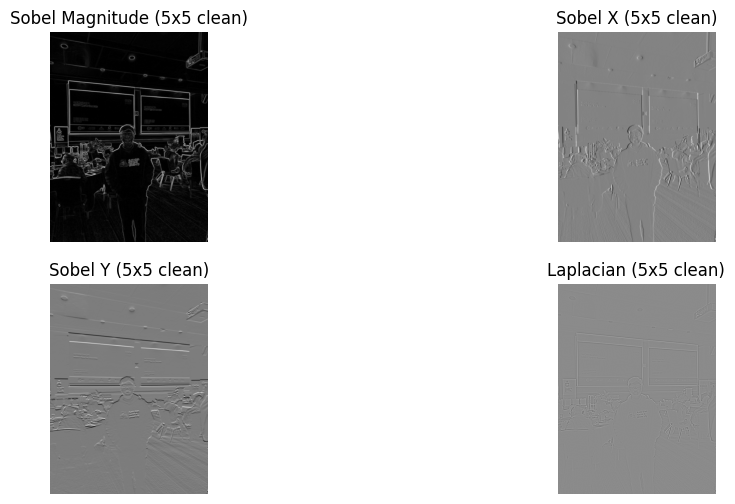

---- Results for Filter Size 5x5 (Noisy Image) ----


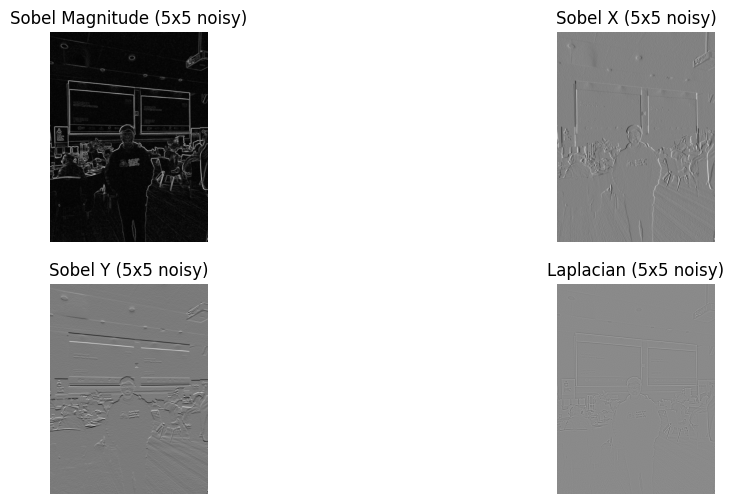

---- Results for Filter Size 7x7 (Clean Image) ----


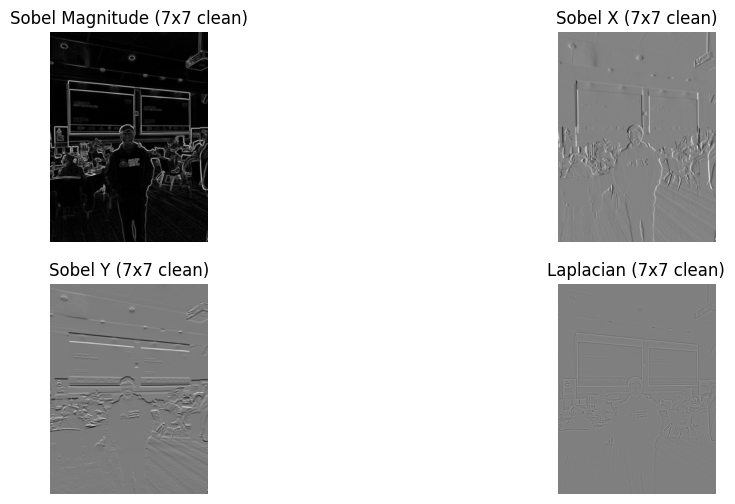

---- Results for Filter Size 7x7 (Noisy Image) ----


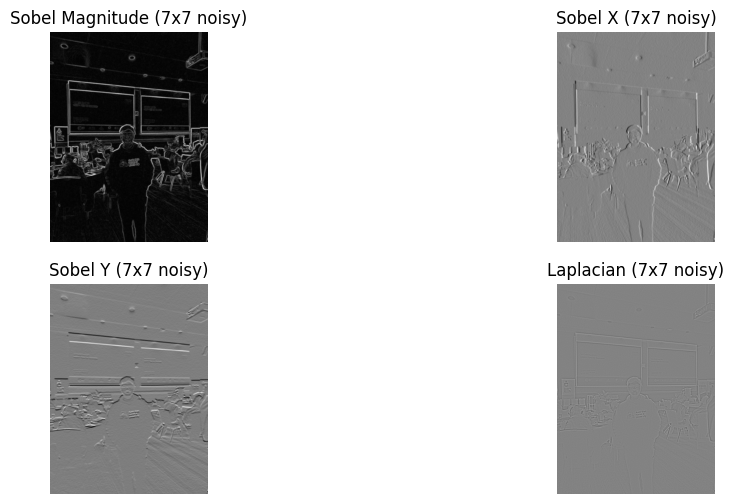

In [25]:
# Let's automate the display for clean & noisy images, all filter sizes
filter_sizes = [3,5,7]

for i, size in enumerate(filter_sizes):
    print(f"---- Results for Filter Size {size}x{size} (Clean Image) ----")
    sobel_mag, sobelx, sobely, laplacian = edges_clean[i]
    plt.figure(figsize=(12,6))
    plt.subplot(2,2,1); plt.imshow(sobel_mag, cmap='gray'); plt.title(f"Sobel Magnitude ({size}x{size} clean)"); plt.axis("off")
    plt.subplot(2,2,2); plt.imshow(sobelx, cmap='gray'); plt.title(f"Sobel X ({size}x{size} clean)"); plt.axis("off")
    plt.subplot(2,2,3); plt.imshow(sobely, cmap='gray'); plt.title(f"Sobel Y ({size}x{size} clean)"); plt.axis("off")
    plt.subplot(2,2,4); plt.imshow(laplacian, cmap='gray'); plt.title(f"Laplacian ({size}x{size} clean)"); plt.axis("off")
    plt.show()

    print(f"---- Results for Filter Size {size}x{size} (Noisy Image) ----")
    sobel_mag, sobelx, sobely, laplacian = edges_noisy[i]
    plt.figure(figsize=(12,6))
    plt.subplot(2,2,1); plt.imshow(sobel_mag, cmap='gray'); plt.title(f"Sobel Magnitude ({size}x{size} noisy)"); plt.axis("off")
    plt.subplot(2,2,2); plt.imshow(sobelx, cmap='gray'); plt.title(f"Sobel X ({size}x{size} noisy)"); plt.axis("off")
    plt.subplot(2,2,3); plt.imshow(sobely, cmap='gray'); plt.title(f"Sobel Y ({size}x{size} noisy)"); plt.axis("off")
    plt.subplot(2,2,4); plt.imshow(laplacian, cmap='gray'); plt.title(f"Laplacian ({size}x{size} noisy)"); plt.axis("off")
    plt.show()


# Question 4

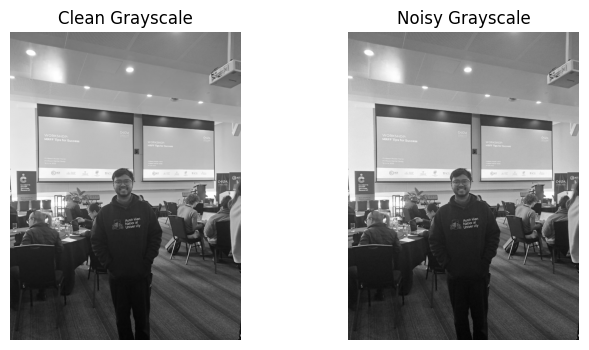

In [26]:
# Let's start with loading the image again
img4 = cv2.imread("my_photo.jpg")
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Create a noisy version (Gaussian noise like before)
mean, var = 0, 15
sigma = var ** 0.5
gauss = np.random.normal(mean, sigma, img4_rgb.shape).astype('float32')
img4_noisy = img4_rgb + gauss
img4_noisy = np.clip(img4_noisy, 0, 255).astype('uint8')

# Convert to grayscale (Canny works on grayscale)
gray_clean = cv2.cvtColor(img4_rgb, cv2.COLOR_RGB2GRAY)
gray_noisy = cv2.cvtColor(img4_noisy, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(gray_clean, cmap="gray"); plt.title("Clean Grayscale"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(gray_noisy, cmap="gray"); plt.title("Noisy Grayscale"); plt.axis("off")
plt.show()


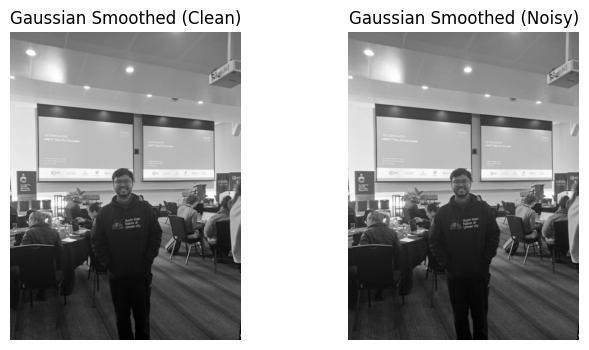

In [27]:
# Step 1: Apply Gaussian smoothing to reduce noise before edge detection
def gaussian_kernel(size=5, sigma=1):
    """Generate a (size x size) Gaussian kernel."""
    ax = np.linspace(-(size//2), size//2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2*sigma**2))
    return kernel / np.sum(kernel)

def apply_gaussian(img, size=5, sigma=1):
    kernel = gaussian_kernel(size, sigma)
    return cv2.filter2D(img, -1, kernel)

blur_clean = apply_gaussian(gray_clean, 5, 1)
blur_noisy = apply_gaussian(gray_noisy, 5, 1)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(blur_clean, cmap="gray"); plt.title("Gaussian Smoothed (Clean)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(blur_noisy, cmap="gray"); plt.title("Gaussian Smoothed (Noisy)"); plt.axis("off")
plt.show()


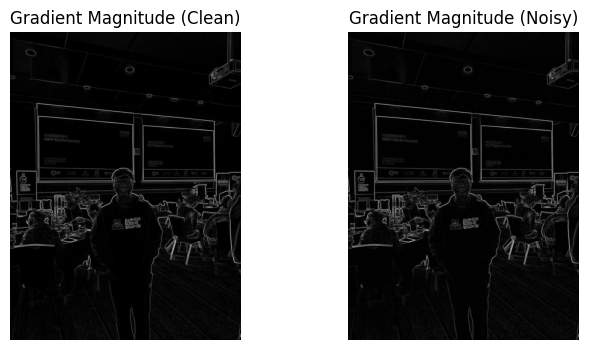

In [28]:
# Step 2: Compute gradients using Sobel operator
def compute_gradients(img):
    Kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    Ky = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

    Ix = cv2.filter2D(img.astype('float32'), -1, Kx)
    Iy = cv2.filter2D(img.astype('float32'), -1, Ky)

    mag = np.sqrt(Ix**2 + Iy**2)
    mag = mag / mag.max() * 255   # normalize to 0-255
    theta = np.arctan2(Iy, Ix)

    return mag, theta

mag_clean, theta_clean = compute_gradients(blur_clean)
mag_noisy, theta_noisy = compute_gradients(blur_noisy)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(mag_clean, cmap="gray"); plt.title("Gradient Magnitude (Clean)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(mag_noisy, cmap="gray"); plt.title("Gradient Magnitude (Noisy)"); plt.axis("off")
plt.show()


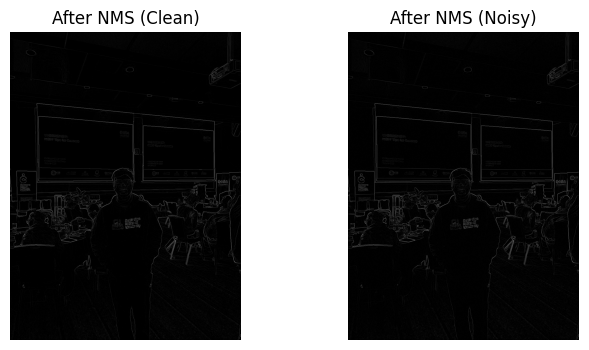

In [29]:
# Step 3: Non-maximum suppression to thin the edges
def non_maximum_suppression(mag, theta):
    M, N = mag.shape
    Z = np.zeros((M,N), dtype=np.float32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1,M-1):
        for j in range(1,N-1):
            q, r = 255, 255
            # angle 0
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = mag[i, j+1]
                r = mag[i, j-1]
            # angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                q = mag[i+1, j-1]
                r = mag[i-1, j+1]
            # angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                q = mag[i+1, j]
                r = mag[i-1, j]
            # angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                q = mag[i-1, j-1]
                r = mag[i+1, j+1]
            if (mag[i,j] >= q) and (mag[i,j] >= r):
                Z[i,j] = mag[i,j]
            else:
                Z[i,j] = 0
    return Z

nms_clean = non_maximum_suppression(mag_clean, theta_clean)
nms_noisy = non_maximum_suppression(mag_noisy, theta_noisy)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(nms_clean, cmap="gray"); plt.title("After NMS (Clean)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(nms_noisy, cmap="gray"); plt.title("After NMS (Noisy)"); plt.axis("off")
plt.show()


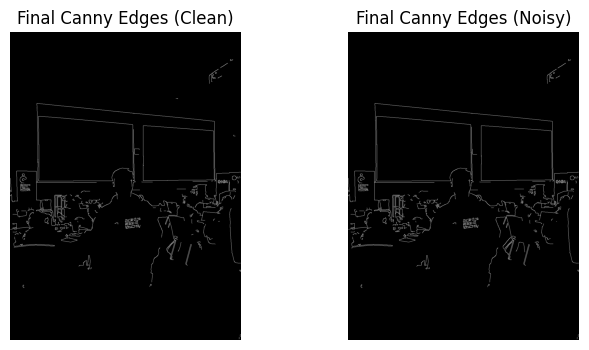

In [30]:
# Step 4: Hysteresis Thresholding
def hysteresis(img, low_thresh=50, high_thresh=100):
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.uint8)

    strong = 255
    weak = 75

    strong_i, strong_j = np.where(img >= high_thresh)
    weak_i, weak_j = np.where((img <= high_thresh) & (img >= low_thresh))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    # Edge tracking by hysteresis
    for i in range(1, M-1):
        for j in range(1, N-1):
            if res[i,j] == weak:
                if ((res[i+1, j-1] == strong) or (res[i+1, j] == strong) or (res[i+1, j+1] == strong)
                    or (res[i, j-1] == strong) or (res[i, j+1] == strong)
                    or (res[i-1, j-1] == strong) or (res[i-1, j] == strong) or (res[i-1, j+1] == strong)):
                    res[i,j] = strong
                else:
                    res[i,j] = 0
    return res

canny_clean = hysteresis(nms_clean, 50, 100)
canny_noisy = hysteresis(nms_noisy, 50, 100)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(canny_clean, cmap="gray"); plt.title("Final Canny Edges (Clean)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(canny_noisy, cmap="gray"); plt.title("Final Canny Edges (Noisy)"); plt.axis("off")
plt.show()
